# FINM HW 2

## Problem 1

1. “Alternative ETFs”
Describe the two types of investments referenced by this term.

Alternative assets, and alternative strategies

2. Hedge Funds

a.) Using just the information in the case, what are two measures by which hedge funds are an
attractive investment?

Hedge funds outperformed stocks and bonds in the last two decades. 
Hedge funds have had better risk adjusted returns
Hedge funds have had lower drawdowns

b.) What are the main benefits of investing in hedge funds via an ETF instead of directly?

There is liquidity.
No minimum deposit.
Access for many more investors.
No hedge fund fees

3. The Benchmarks

a.) Explain as simply as possible how HFRI, MLFM, MLFM-ES, and HDG differ in their
construction and purpose.

HFRI (Hedge Fund Return Index) is hedge fund index to benchmark hedge fund performance.
MLFM (Merrill Lynch Factor Model) identifies and gives weights for different factors driving equity returns in hedge funds/
MLFM-ES (Merrill Lynch Factor Model - Exchange Series) - same as above but all factors are directly tradeable
HDG (Hedge Replication ETF) - An ETF which seeks to replicate hedge funds. Goal is to have high correlation with HFRI

b.) How well does the Merrill Lynch Factor Model (MLFM) track the HFRI?

MLFM tracked HFRI with correlation coeficcient of 90% which case author said is good. Up until 2012 had positive correlation.

c.) In which factor does the MLFM have the largest loading?

Has highest loading in 3 month T-Bills

d.) What are the main concerns you have for how the MLFM attempts to replicate the HFRI?

Does replicating weights of market factors even replicate hedge funds accurately? The factors included in MLFM may not be comprehensive. There may not be directly tradeable assets for some relevant market factors the hedge funds invest in. This is a concern with HDG more so than MLFM, but how exactly is liquidity achieved?


4. The HDG Product

a.) What does ProShares ETF, HDG, attempt to track? Is the tracking error small?

It attempts to track hedge funds (HFRI). I don't think the tracking error is mentioned

b.) HDG is, by construction, delivering beta for investors. Isn’t the point of hedge funds to
generate alpha? Then why would HDG be valuable?

It is valuable because reduced risk higher diversification. More liquidity and transparency.

c.) The fees of a typical hedge-fund are 2% on total assets plus 20% of excess returns if positive.
HDG’s expense ratio is roughly 1% on total assets. What would their respective net Sharpe
Ratios be, assuming both have a gross excess returns of 10% and volatility of 20%?

Typical Hedge Fund: 0.30 
HDG: 0.45

## Problem 2

1. For the series in the “hedge fund series” tab, report the following summary statistics
a.) mean
b.) volatility
c.) sharpe ratio


In [46]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
pd.options.display.float_format = '{:.2}'.format

data = pd.read_excel('proshares_analysis_data.xlsx', sheet_name=None, index_col=0)

print(data.keys())

descriptions = data["descriptions"]
hf_series = data["hedge_fund_series"]
m_factors = data["merrill_factors"]
other = data["other_data"]

display(descriptions)
display(hf_series)
#display(m_factors)
# display(other)
hf_series.columns

dict_keys(['descriptions', 'hedge_fund_series', 'merrill_factors', 'other_data'])


,Descriptions
EEM US Equity,ISHARES MSCI EMERGING MARKET
EFA US Equity,ISHARES MSCI EAFE ETF
EUO US Equity,PROSHARES ULTRASHORT EURO
HDG US Equity,PROSHARES HEDGE REPLICAT ETF
HEFA US Equity,ISHA CURR HEDGED MSCI EAFE
HFRIFWI Index,HFRI Fund Weighted Composite I
IWM US Equity,ISHARES RUSSELL 2000 ETF
MLEIFCTR Index,ML Factor Model
MLEIFCTX Index,ML Factor ModelX
QAI US Equity,IQ HEDGE MULTI-STRAT TRACKER


,HFRIFWI Index,MLEIFCTR Index,MLEIFCTX Index,HDG US Equity,QAI US Equity
2011-08-31,-0.032,-0.026,-0.026,-0.027,-0.0065
2011-09-30,-0.039,-0.032,-0.033,-0.032,-0.022
2011-10-31,0.027,0.044,0.043,0.051,0.025
2011-11-30,-0.013,-0.012,-0.012,-0.029,-0.008
2011-12-31,-0.0045,0.0019,0.0018,0.013,0.0019
...,...,...,...,...,...
2023-01-31,0.027,0.034,0.034,0.035,0.029
2023-02-28,-0.0064,-0.0016,-0.0019,-0.0024,-0.0085
2023-03-31,-0.008,-0.005,-0.0049,-0.007,0.0059
2023-04-30,0.0024,0.00085,0.00033,-0.00044,0.0051


Index(['HFRIFWI Index', 'MLEIFCTR Index', 'MLEIFCTX Index', 'HDG US Equity',
       'QAI US Equity'],
      dtype='object')

In [12]:
def summary_stats(rets, adj_factor=12):
    """
    Given a dataframe of returns, this function returns a dataframe with
    a summary of performance statistics for individual securities.
    """
    stats = {}
    
    stats['Annualized Mean'] = rets.mean() * adj_factor
    stats['Annualized Volatility'] = rets.std() * np.sqrt(adj_factor)
    stats['Annualized Sharpe Ratio'] = (stats['Annualized Mean'] / stats['Annualized Volatility'])
    
    return pd.DataFrame(stats, index=rets.columns)

stats = summary_stats(hf_series).sort_values("Annualized Sharpe Ratio", ascending=False)

display(stats)

,Annualized Mean,Annualized Volatility,Annualized Sharpe Ratio
HFRIFWI Index,0.041,0.06,0.69
MLEIFCTR Index,0.031,0.057,0.54
MLEIFCTX Index,0.029,0.057,0.51
QAI US Equity,0.017,0.05,0.34
HDG US Equity,0.019,0.06,0.33


2. For the series in the “hedge fund series” tab, , calculate the following statistics related to tail-
risk.

(a) Skewness

(b) Kurtosis

(c) the fifth quantile of historic returns, which is also known as the Value-at-Risk (VaR)

(d) the mean of the returns at or below the fifth quantile, which is also known as the Conditional
Value-at-Risk (CVaR)

(e) Maximum drawdown - include the dates of the max/min/recovery within the max drawdown
period.

In [28]:
def risk_stats(rets):
    """
    """
    stats = {}
    
    stats['Skewness'] = rets.skew()
    stats['Kurtosis'] = rets.kurtosis()
    stats['VaR'] = rets.quantile(0.05, axis=0)
    stats['cVaR'] = rets[rets <= rets.quantile(0.05, axis=0)].mean()

    stats["Min"] = rets.min()
    stats["Max"] = rets.max()
    cum_prod = (1+ rets).cumprod()
    cum_max = cum_prod.cummax()
    drawdowns = (cum_prod - cum_max) / cum_max
    stats["Peak"] = cum_prod.idxmax()
    stats["Bottom"] = drawdowns.idxmin()

    cum_prod = (1+hf_series).cumprod()
    #display(cum_prod)
    cum_max = cum_prod.cummax()
    #display(cum_max)
    drawdowns = (cum_prod - cum_max)
    #display(drawdowns)
    drawdowns.idxmin()
    recovery_date = []
    for col in cum_prod.columns:
        prev_max = cum_max[col][: drawdowns[col].idxmin()].max()
        recovery_wealth = pd.DataFrame([cum_prod[col][drawdowns[col].idxmin() :]]).T
        recovery_date.append(
            recovery_wealth[recovery_wealth[col] >= prev_max].index.min()
        )
    stats["Recovery"] = ["-" if pd.isnull(i) else i for i in recovery_date]

    stats["Duration (days)"] = [
        (i - j).days if i != "-" else "-"
        for i, j in zip(stats["Recovery"], stats["Bottom"])
    ]
    
    
    return pd.DataFrame(stats, index=rets.columns)

stats = risk_stats(hf_series)

display(stats)



,Skewness,Kurtosis,VaR,cVaR,Min,Max,Peak,Bottom,Recovery,Duration (days)
HFRIFWI Index,-0.98,6.0,-0.025,-0.037,-0.091,0.059,2021-10-31,2020-03-31,2020-08-31 00:00:00,153
MLEIFCTR Index,-0.24,1.7,-0.029,-0.036,-0.053,0.059,2021-06-30,2022-09-30,-,-
MLEIFCTX Index,-0.23,1.7,-0.029,-0.036,-0.052,0.059,2021-06-30,2022-09-30,-,-
HDG US Equity,-0.23,1.8,-0.031,-0.038,-0.059,0.058,2021-06-30,2022-09-30,-,-
QAI US Equity,-0.46,1.8,-0.021,-0.033,-0.056,0.04,2021-06-30,2022-09-30,-,-


3. For the series in the “hedge fund series” tab, run a regression of each against SPY (found in the
“merrill factors” tab.) Include an intercept. Report the following regression-based statistics:

(a) Market Beta

(b) Treynor Ratio

(c) Information ratio

No need to annualize the market beta. The Treynor ratio is annualized by multiplying by the
number of periods in a year (12). The Information ratio is annualized by multiplying by rt 12

In [44]:
def calc_univ_regr(y, X, intercept=True, adj=12):
    """
    Calculate a univariate regression of y on X. Note that both X and y
    need to be one-dimensional.

    Args:
        y : target variable
        X : independent variable
        intercept (bool, optional): Fit the regression with an intercept or not. Defaults to True.
        adj (int, optional): What to adjust the returns by. Defaults to 12.

    Returns:
        DataFrame: Summary of regression results
    """
    X_down = X[y < 0]
    y_down = y[y < 0]
    if intercept:
        X = sm.add_constant(X)
        X_down = sm.add_constant(X_down)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()

    # More ternary operators.
    inter = results.params[0] if intercept else 0
    beta = results.params[1] if intercept else results.params[0]

    summary = dict()

    summary["Alpha"] = inter * adj
    summary["Beta"] = beta

    # Note: Downside Beta is not part of the course, but is a useful metric to know.
    down_mod = sm.OLS(y_down, X_down, missing="drop").fit()
    summary["Downside Beta"] = down_mod.params[1] if intercept else down_mod.params[0]

    summary["R-Squared"] = results.rsquared
    summary["Treynor Ratio"] = (y.mean() / beta) * adj
    summary["Information Ratio"] = (inter / results.resid.std()) * np.sqrt(adj)
    summary["Tracking Error"] = (
        inter / summary["Information Ratio"]
        if intercept
        else results.resid.std() * np.sqrt(adj)
    )

    return pd.DataFrame(summary, index=[y.name])


def calc_multi_regr(y, X, intercept=True, adj=12):
    """
    Calculate a multivariate regression of y on X. Adds useful metrics such
    as the Information Ratio and Tracking Error. Note that we can't calculate
    Treynor Ratio or Downside Beta here.

    Args:
        y : target variable
        X : independent variables
        intercept (bool, optional): Defaults to True.
        adj (int, optional): Annualization factor. Defaults to 12.

    Returns:
        DataFrame: Summary of regression results
    """
    if intercept:
        X = sm.add_constant(X)

    model = sm.OLS(y, X, missing="drop")
    results = model.fit()
    summary = dict()

    inter = results.params[0] if intercept else 0
    betas = results.params[1:] if intercept else results.params

    summary["Alpha"] = inter * adj
    summary["R-Squared"] = results.rsquared

    X_cols = X.columns[1:] if intercept else X.columns

    for i, col in enumerate(X_cols):
        summary[f"{col} Beta"] = betas[i]

    summary["Information Ratio"] = (inter / results.resid.std()) * np.sqrt(adj)
    summary["Tracking Error"] = (
        inter / summary["Information Ratio"]
        if intercept
        else results.resid.std() * np.sqrt(adj)
    )
    return pd.DataFrame(summary, index=[y.name])


def calc_iter_regr(y, X, intercept=True, one_to_many=False, adj=12):
    """
    Iterative regression for checking one X column against many different y columns,
    or vice versa. "one_to_many=True" means that we are checking one X column against many
    y columns, and "one_to_many=False" means that we are checking many X columns against a
    single y column.

    Args:
        y : Target variable(s)
        X : Independent variable(s)
        intercept (bool, optional): Defaults to True.
        one_to_many (bool, optional): Which way to run the regression. Defaults to False.
        adj (int, optional): Annualization. Defaults to 12.

    Returns:
        DataFrame : Summary of regression results.
    """
    if one_to_many:
        summary = pd.concat(
            [calc_univ_regr(y[col], X, intercept, adj) for col in y.columns], axis=0
        )
        summary.index = y.columns
        return summary
    else:
        summary = pd.concat(
            [calc_univ_regr(y, X[col], intercept, adj) for col in X.columns], axis=0
        )
        summary.index = X.columns
        return summary

In [47]:
spy = m_factors["SPY US Equity"]
regression_metrics = calc_iter_regr(hf_series, spy, one_to_many=True)
regression_metrics

/var/folders/p4/bd_r2n1s0518hqnlbfbqcc740000gp/T/ipykernel_33693/2345312012.py:25: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  inter = results.params[0] if intercept else 0
/var/folders/p4/bd_r2n1s0518hqnlbfbqcc740000gp/T/ipykernel_33693/2345312012.py:26: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  beta = results.params[1] if intercept else results.params[0]
/var/folders/p4/bd_r2n1s0518hqnlbfbqcc740000gp/T/ipykernel_33693/2345312012.py:35: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavi

,Alpha,Beta,Downside Beta,R-Squared,Treynor Ratio,Information Ratio,Tracking Error
HFRIFWI Index,-0.0036,0.35,0.29,0.71,0.12,-0.11,0.0027
MLEIFCTR Index,-0.015,0.35,0.29,0.8,0.088,-0.57,0.0021
MLEIFCTX Index,-0.016,0.35,0.29,0.8,0.084,-0.62,0.0021
HDG US Equity,-0.027,0.36,0.28,0.78,0.054,-0.96,0.0023
QAI US Equity,-0.021,0.29,0.22,0.74,0.058,-0.83,0.0021


4. Relative Performance
Discuss the previous statistics, and what they tell us about...

(a) the differences between SPY and the hedge-fund series?

(b) which performs better between HDG and QAI.

(c) whether HDG and the ML series capture the most notable properties of HFRI.

(a) 

5. Report the correlation matrix for these assets.

(a) Show the correlations as a heat map.

(b) Which series have the highest and lowest correlations?

In [32]:
def plot_corr_matrix(corrs):
    # Correlation helper function.
    return sns.heatmap(
        corrs,
        annot=True,
        cmap="coolwarm",
        vmin=-1,
        vmax=1,
        linewidths=0.7,
        annot_kws={"size": 10},
        fmt=".2f",
        square=True,
        cbar_kws={"shrink": 0.75},
    )


def print_max_min_corr(corrs):
    # Correlation helper function.
    corr_series = corrs.unstack()
    corr_series = corr_series[corr_series != 1]

    max_corr = corr_series.abs().agg(["idxmax", "max"]).T
    min_corr = corr_series.abs().agg(["idxmin", "min"]).T
    min_corr_raw = corr_series.agg(["idxmin", "min"]).T
    max_corr, max_corr_val = max_corr["idxmax"], max_corr["max"]
    min_corr, min_corr_val = min_corr["idxmin"], min_corr["min"]
    min_corr_raw, min_corr_raw_val = min_corr_raw["idxmin"], min_corr_raw["min"]

    print(
        f"Max Corr (by absolute value): {max_corr[0]} and {max_corr[1]} with a correlation of {max_corr_val:.2f}"
    )
    print(
        f"Min Corr (by absolute value): {min_corr[0]} and {min_corr[1]} with a correlation of {min_corr_val:.2f}"
    )
    print(
        f"Min Corr (raw): {min_corr_raw[0]} and {min_corr_raw[1]} with a correlation of {min_corr_raw_val:.2f}"
    )

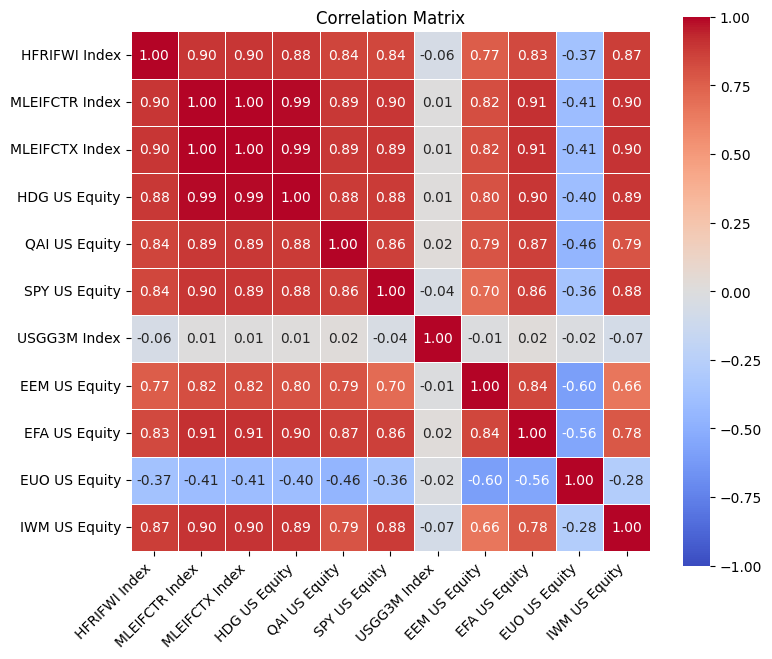

In [49]:
corr_matrix = pd.concat([hf_series, m_factors], axis=1).corr()

fig, _ = plt.subplots(figsize=(8, 8))
ax = plot_corr_matrix(corr_matrix)

ax.set_title("Correlation Matrix")

ax.set_xticklabels(ax.get_xticklabels(), rotation=45, horizontalalignment="right")

fig.tight_layout()

In [50]:
print_max_min_corr(corr_matrix)

Max Corr (by absolute value): MLEIFCTR Index and MLEIFCTX Index with a correlation of 1.00
Min Corr (by absolute value): MLEIFCTX Index and USGG3M Index with a correlation of 0.01
Min Corr (raw): EEM US Equity and EUO US Equity with a correlation of -0.60


6. Replicate HFRI with the six factors listed on the “merrill factors” tab. Include a constant, and
run the unrestricted regression
$$
r^{hfri}_{t} = α^{merr} + x^{merr}_{t}β^{merr} + ε^{merr}_{t}
$$
$$
\hat{r}^{hfri}_{t} = \hat{α}^{merr} + x^{merr}_{t}\hat{β}^{merr}
$$
Note that the second equation is just our notation for the fitted replication.

(a) Report the intercept and betas.

(b) Are the betas realistic position sizes, or do they require huge long-short positions?

(c) Report the R-squared.

(d) Report the volatility of εmerr, (the tracking error.)